In [518]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

appl_df = pd.read_csv("/mnt/c/Users/Amro/Downloads/applications.csv")
props_df = pd.read_csv("/mnt/c/Users/Amro/Downloads/all_properties.csv")

# matching_df = pd.read_csv("/mnt/c/Users/Amro/Desktop/DOI LISTS/Processing Batches - results/")

doi_pub_df = pd.read_csv("/mnt/c/Users/Amro/Downloads/DOI_Publisher.csv")

ws_df = pd.read_csv("/mnt/c/Users/Amro/Downloads/water_stability.csv")

ws24_df = pd.read_csv("/mnt/c/Users/Amro/Downloads/labels.csv")

In [479]:
plt.rcParams['svg.fonttype'] = 'none'

## Examining Property Extraction

### Number of Properties per MOF before Filtering

In [2]:
props_df = props_df.drop(["Unnamed: 0.2", "Unnamed: 0.1", "Unnamed: 0"], axis = 1).merge(doi_pub_df, how='left', right_on="DOI", left_on="Reference").drop("DOI", axis=1)

props_df.head()

,MOF Name,Ref Code,Property,Value,Units,Condition,Summary,Reference,Publisher
0,Cd(L2)(SCN)2<|>compound 10,DUHDOA,Yield,52,%,based on Cd,Cd(L2(SCN)2.Yield 52% (based on Cd).,10.1021/cg900515j,ACS
1,Cd(L2)(SCN)2<|>compound 10,DUHDOA,Elemental Analysis Calculated for Carbon,27.28,%,Not specified,Elemental analysis calcd (%) for C10H9CdN5S4: ...,10.1021/cg900515j,ACS
2,Cd(L2)(SCN)2<|>compound 10,DUHDOA,Elemental Analysis Found for Carbon,27.35,%,Not specified,"Found: C 27.35, H 2.19, N 15.97.",10.1021/cg900515j,ACS
3,Cd(L2)(SCN)2<|>compound 10,DUHDOA,Elemental Analysis Calculated for Hydrogen,2.05,%,Not specified,Elemental analysis calcd (%) for C10H9CdN5S4: ...,10.1021/cg900515j,ACS
4,Cd(L2)(SCN)2<|>compound 10,DUHDOA,Elemental Analysis Found for Hydrogen,2.19,%,Not specified,"Found: C 27.35, H 2.19, N 15.97.",10.1021/cg900515j,ACS


In [3]:
props_per_mof = props_df[["Ref Code", "Property"]].groupby("Ref Code").count()
average_PPM = props_per_mof["Property"].mean()

print(f"Average properties per CSD Entry: {average_PPM:.1f}")

Average properties per CSD Entry: 10.4


In [78]:
props_df[props_df["Property"].apply(lambda x: "gof" in x.lower())]

,MOF Name,Ref Code,Property,Value,Units,Condition,Summary,Reference,Publisher
427,[NH2(CH3)2][Nd(MDIP)(H2O)]<|>compound 2,RAVCUO,gof on f2,1.103,NaN,NaN,"""GOF on F2 1.103""",10.1021/cg201283a,ACS
713,"Compound 3a<|>Cd2(4-tp-3-lad)(1,4-BDC)2",IBIXID,gof,1.153,NaN,NaN,GOF 1.153,10.1021/acs.cgd.6b01728,ACS
1276,[TbAg(Hbic)2(C2O4)H2O]·2H2O<|>complex 3,QURYUY,gof,1.174,NaN,None specified,GOF 1.174,10.1021/cg900571v,ACS
2383,Cu3(MedeaH)2(oba)2(H2O)<|>compound 8,LAZSIQ,gof on f2,1.037,none,none,"""GOF on F 2 1.037""",10.1021/cg300434k,ACS
2610,[Cd(L1)(L5)]∞<|>4,MEFJUD,gof,1.06,NaN,NaN,"""Crystallographic Data and Structure Refinemen...",10.1021/cg050336q,ACS
...,...,...,...,...,...,...,...,...,...
150341,AgOtf(PMP-41)<|>compound 5,DOSRAF,goodness-of-fit (gof) on f²,1.030,NaN,110 K,"""Goodness-of-fit (GOF) on F 2 1.030""",10.1016/j.ica.2008.04.032,Elsevier
150623,[Cd(mtaa)(H2O)]n<|>complex 2,XAKRUY,goodness-of-fit (gof) on f²,1.055,NaN,NaN,Goodness-of-fit (GOF) on F² 1.055,10.1016/j.poly.2011.11.036,Elsevier
150748,"μ5-5-(2-(2-Hydroxyethoxy)ethoxy)benzene-1,3-di...",OQANIE,goodness-of-fit (gof),1.295,NaN,NaN,Crystallographic data for 4. | Goodness-of-fit...,10.1016/j.ica.2010.06.022,Elsevier
151651,{[Cu(bptc)0.5(H2O)]·H2O}n<|>complex 2,JOJGIA,goodness-of-fit (gof),1.061,NaN,NaN,Complexes 1 2 3 Chemical formula C14H8CdN2O9 C...,10.1016/j.ica.2014.03.023,Elsevier


### Properties per MOF for Each Publisher

<Axes: xlabel='Publisher'>

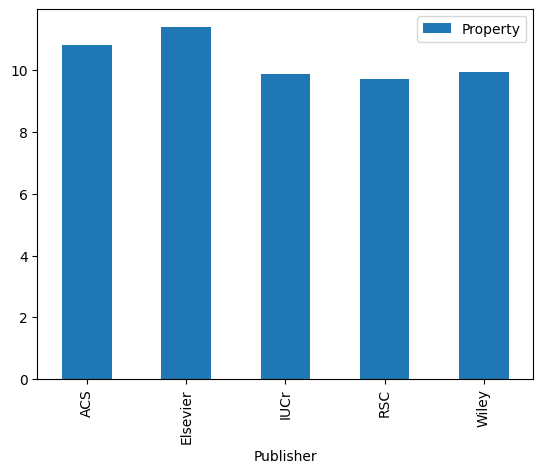

In [5]:
props_per_mof = props_df[["Ref Code", "Property", "Publisher"]].groupby(["Ref Code", "Publisher"]).count().groupby("Publisher").mean()

props_per_mof.plot(kind="bar")

### Distribution of Properties found

In [17]:
dist_props = props_df
dist_props["Property"] = dist_props["Property"].apply(lambda x: x.lower())
dist_props = props_df[["Ref Code", "Property"]].groupby("Property").count().sort_values("Ref Code", ascending=False)

dist_props.reset_index(inplace=True)

dist_props.head()

,Property,Ref Code
0,space group,10390
1,crystal system,9490
2,cell volume,5547
3,density,4869
4,thermal stability,3972


In [7]:
uptake_df = dist_props[dist_props["Property"].apply(lambda x: "uptake" in x.lower())]

In [8]:
len(dist_props)

25785

Text(0.5, 1.0, 'Distribution of extracted properties')

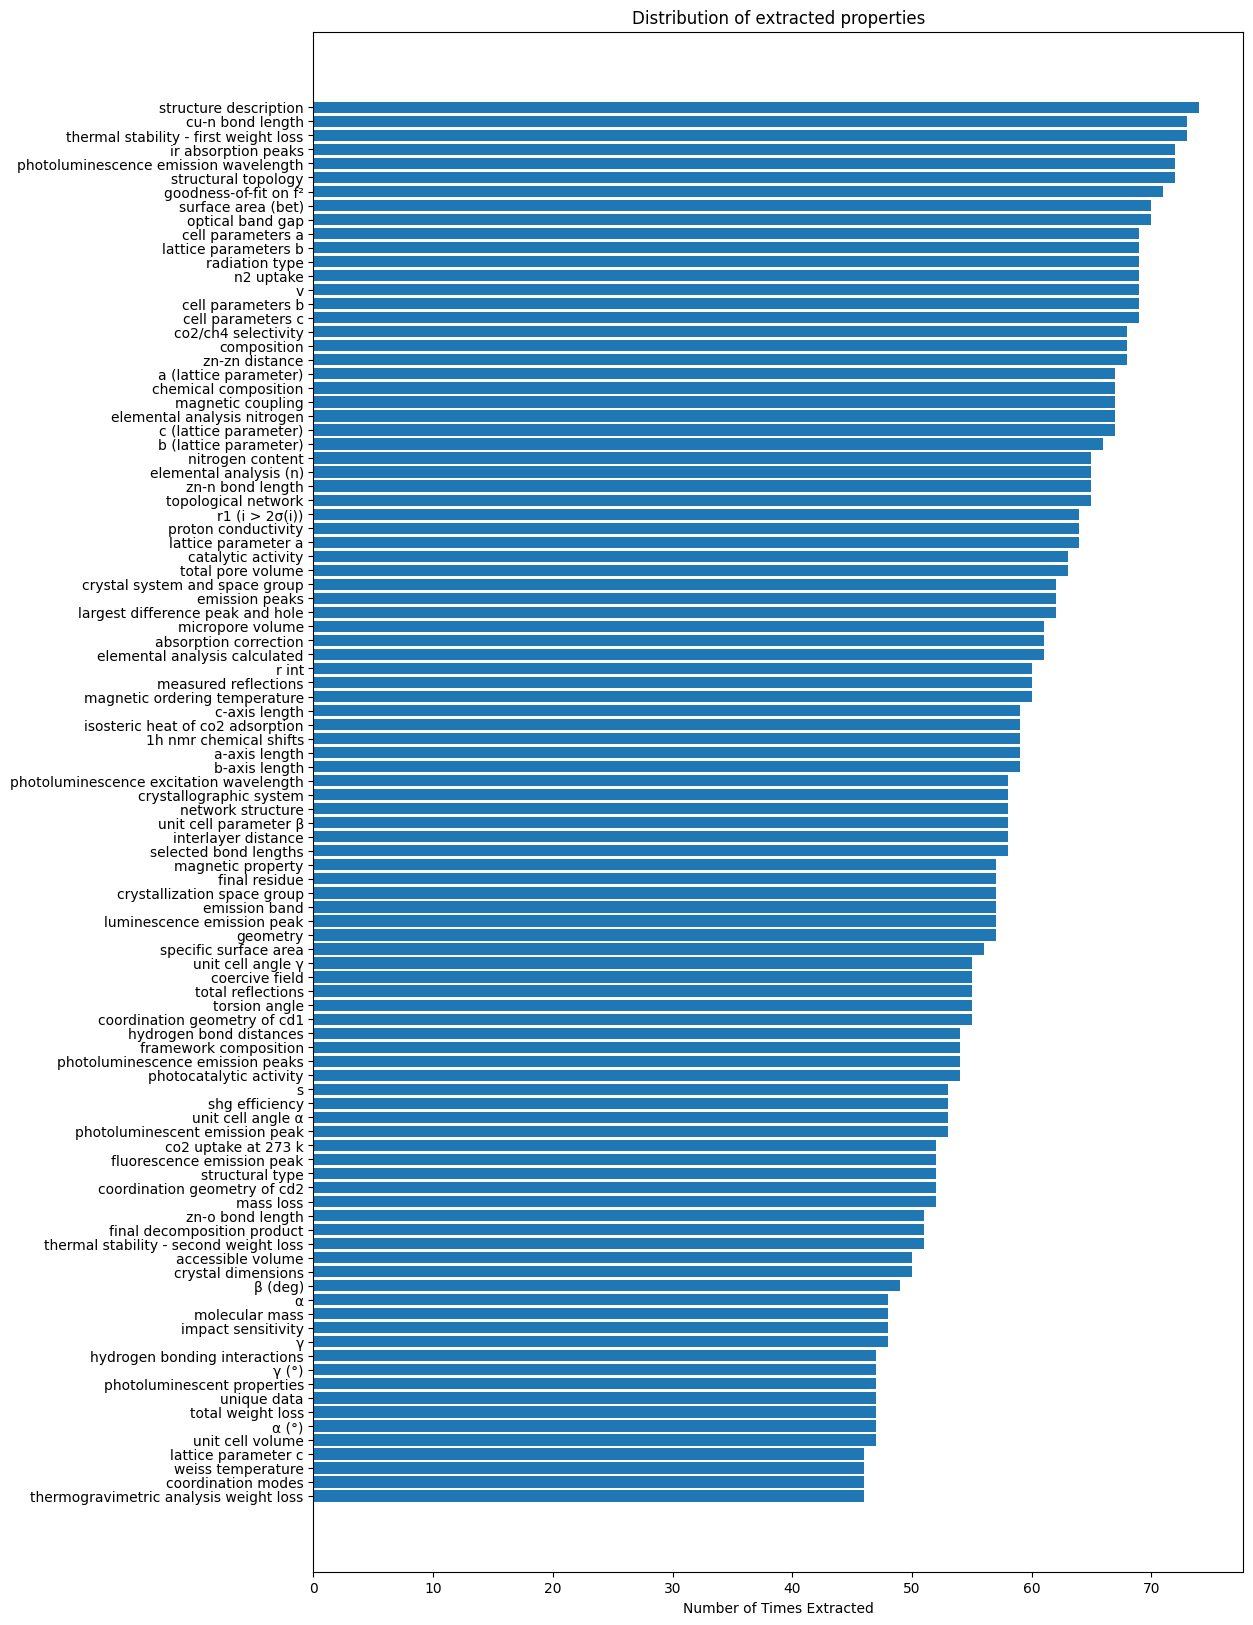

In [23]:
fig, ax = plt.subplots(figsize=(12, 20))

labels = list(dist_props["Property"].iloc[200:300])
pos = np.arange(len(labels))

values = dist_props["Ref Code"].iloc[200:300]

ax.barh(pos, values, align='center')
ax.set_yticks(pos, labels=labels)
ax.invert_yaxis()
ax.set_xlabel("Number of Times Extracted")
ax.set_title("Distribution of extracted properties")

### Attempting to Cluster using Embeddings from text-embedding-ada-002	

In [10]:
from multiprocess import Pool
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

In [11]:
dist_props["Embedding"] = pd.Series(np.zeros(len(dist_props)))

dist_props.head()

,Property,Ref Code,Embedding
0,space group,10390,0.0
1,crystal system,9490,0.0
2,cell volume,5547,0.0
3,density,4869,0.0
4,thermal stability,3972,0.0


In [12]:
len(dist_props)

25785

In [36]:
from openai import OpenAI

with open(".apikey", 'r') as f:
    client = OpenAI(api_key=f.read())

def embed_properties(start: int, end: int):
    ret_embeddings = dist_props[["Property", "Embedding"]][start:end].copy(deep=True)
    
    ret_embeddings["Embedding"] = ret_embeddings["Property"].apply(lambda x: client.embeddings.create(input=x.lower(),
                                                                            model="text-embedding-ada-002").data[0].embedding)
    

    return ret_embeddings

# with Pool(processes=8) as pool:
#     params = [(i*len(dist_props)//8, (i+1)*len(dist_props)//8) for i in range(8)]
#     results = [pool.apply_async(embed_properties, p) for p in params]

# final = pd.concat([r.get() for r in results])

dist_props["Embedding"][:2000] = dist_props["Property"][:2000].apply(lambda x: 
                                                        client.embeddings.create(input=x.lower(),
                                                                                model="text-embedding-ada-002").data[0].embedding)

/tmp/ipykernel_36864/1243535933.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dist_props["Embedding"][:2000] = dist_props["Property"][:2000].apply(lambda x:
/tmp/ipykernel_36864/1243535933.py:21: SettingWithCopyWarning: 
A value is tr

In [14]:
embeddings = np.array(list(dist_props["Embedding"][:2000]))

KeyError: 'Embedding'

In [138]:
props_pca = PCA(n_components=100).fit_transform(embeddings)

props_svd = TruncatedSVD(100).fit_transform(embeddings)

In [166]:
prop_tsne = TSNE(n_components=2, perplexity=50, learning_rate='auto', init='random')
prop_tsne = prop_tsne.fit_transform(embeddings)

prop_pca_tsne = TSNE(n_components=2, perplexity=5, learning_rate='auto', init='random')
prop_pca_tsne = prop_pca_tsne.fit_transform(props_pca)

prop_svd_tsne = TSNE(n_components=2, perplexity=5, learning_rate='auto', init='random')
prop_svd_tsne = prop_svd_tsne.fit_transform(props_svd)

Text(0.5, 1.0, 'SVD Then TSNE')

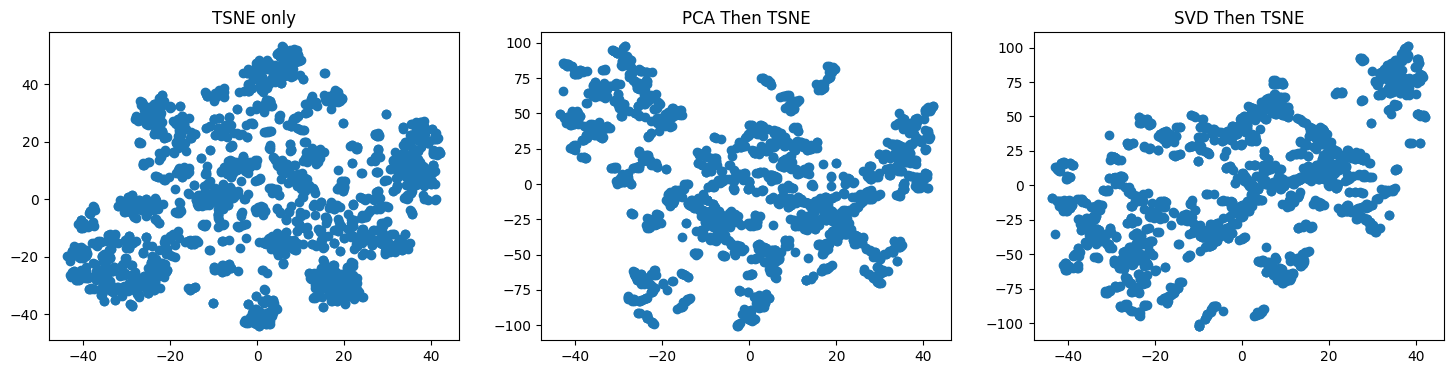

In [167]:
fig, ax = plt.subplots(1, 3, figsize=(18,4))

ax[0].scatter(x=prop_tsne[:, 0], y=prop_tsne[:, 1])
ax[0].set_title("TSNE only")

ax[1].scatter(x=prop_tsne[:, 0], y=prop_pca_tsne[:, 1])
ax[1].set_title("PCA Then TSNE")

ax[2].scatter(x=prop_tsne[:, 0], y=prop_svd_tsne[:, 1])
ax[2].set_title("SVD Then TSNE")

In [168]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [197]:
k = 20
model = GaussianMixture(k) # KMeans(k)

model.fit(embeddings)

clusters = model.predict(embeddings)

Text(0.5, 1.0, 'TSNE only')

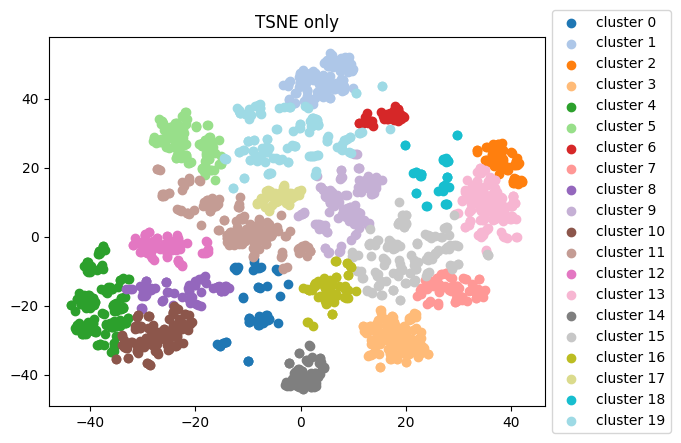

In [199]:
fig, ax = plt.subplots()

cmap = plt.colormaps.get("tab20")
colors = [cmap(i) for i in range(k)]

for i in range(k):
    ax.scatter(x=prop_tsne[clusters==i, 0], y=prop_tsne[clusters==i, 1], c=[colors[i]], label=f"cluster {i}")

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("TSNE only")

In [273]:
dist_props[:2000].iloc[clusters==12].head(20)

,Property,Ref Code,Embedding
14,topology,1114,"[0.00863999966531992, 0.00532472925260663, -0...."
53,pore size,256,"[0.01622920110821724, 0.007310763001441956, 0...."
80,synthesis temperature,174,"[-0.013911960646510124, -0.005205788183957338,..."
101,unit cell dimensions a,141,"[0.0066070035099983215, 0.014118337072432041, ..."
127,synthesis yield,118,"[-0.010375593788921833, -0.021728500723838806,..."
128,magnetic susceptibility at 300 k,117,"[-0.01361521054059267, -0.0085103465244174, 0...."
216,co2/ch4 selectivity,68,"[0.011390225030481815, 0.002408150350674987, 0..."
251,unit cell parameter β,58,"[-0.01885814405977726, -0.0017987873870879412,..."
259,geometry,57,"[0.008493771776556969, 0.002396757248789072, 0..."
365,point symbol,37,"[-0.036507006734609604, -0.008050920441746712,..."


## Filtering properties

In [26]:
from thefuzz import process, fuzz

In [56]:
fuzz.ratio("Stability temperature", "Synthesis temperature")

71

In [177]:
properties_dict = {
    "Space Group": ["Space Group", "crystallographic space group"],
    "Crystal System": ["Crystal System"],
    "Cell Volume": ["Cell Volume", "unit cell volume"],
    "Density": ["Density", "Calculated Density", "density calculated", "dc", "dcalc", "d calc", "d calcd", "dcalcd"],
    "Thermal Stability": ["Thermal Stability", "Stability temperature", "decomposition temperature"],
    "Chemical Formula": ["Chemical Formula", "Formula", "Molecular Formula"],
    "Formula Weight": ["Formula Weight", "Molecular Weight", "Formula Mass", "Molar Mass"],
    "Light Absorption Coefficient": ["Light Absorption Coefficient", "Absorption Coefficient"],
    "Topology": ["Topology", "framework topology", "network topology", "structural topology"],
    "Surface Area": ["Surface Area", "Lnagmuir surface area", "surface area langmuir", "surface area bet", "bet surface area"],
    "Magnetic Susceptibility": ["Magnetic Susceptibility", "Magnetic Susceptibility at room temperature", "Magnetic Susceptibility at 300 K"],
    "Magnetic Moment": ["Magnetic Moment", "effective magnetic moment"],
    "Pore Volume": ["Pore Volume", "Pore size"],
    "Pore Diameter": ["Pore Diameter"],
    "Porosity": ["Porosity"],
    "co2 Uptake": ["co2 Uptake", "CO2 adsorption capacity", "carbon dioxide uptake", "CO2 Storage", "carbon dioxide storage", "carbon dioxide adsorption capacity"],
    "h2 uptake": ["h2 uptake", "h2 storage", "h2 adsorption", "hydrogen uptake", "hydrogen storage", "hydrogen adsorption"],
    "n2 uptake": ["n2 uptake", "n2 storage", "n2 adsorption", "nitrogen uptake", "nitrogen storage", "nitrogen adsorption"],
    "weiss constant": ["weiss constant"],
    "curie constant": ["curie constant"],
    "color": ["color", "crystal color"],
    "band gap": ["band gap"],
    "excitation wavelength": ["excitation wavelength", "photoluminescent excitation wavelength", "emission excitation wavelength"],
    "emission wavelength": ["emission wavelength", "fluorescence emission wavelength", "photoluminescence emission wavelength", "photoluminescence emission maximum", "emission maximum", "photoluminescence emission peak", "luminescence emission wavelength", "luminescence emission maximum", "emission peak"],
    "Coordination Geometry": ["Coordination Geometry", "Coordination Environment"],
    "Coordination number": ["Coordination number"],
    "Solvent-accessible Volume": ["Solvent-accessible Volume", "Solvent Accessible Volume"],
    "void volume": ["void volume", "void space"],
    "free volume": ["free volume", "effective free volume"]
}
properties_dict["Remove"] = [
    "yield", "Synthesis yield",
    "bond angles",
    "angles",
    "unit cell angles",
    "bond distances",
    "hydrogen bond geometry",
    "unique reflections",
    "unit cell parameter", "unit cell dimension", "cell parameters",
    "lattice parameters",
    "ir spectrum", "ir spectroscopy", "ir data", "ir spectra peaks", "ir peaks", "ir absorption bands", "ft ir peaks",
    "elemental analysis (carbon)", "(hydrogen)", "(nitrogen)",
    "hydrogen bonds",
    "carbon content", "hydrogen content",
    "wavelength", "emission wavelength range",
    "photoluminescence", "photoluminescence emission maxima",
    "Luminescence",
    "emission peaks",
    "Coordination Mode",
    "Coordination Sphere",
    "Elemental analysis",
    "Elemental analysis - carbon",
    "Elemental analysis - hydrogen",
    "Elemental analysis - nitrogen",
    "c2h2 uptake", "c2h2 storage", "c2h2 adsorption", "hexane uptake", "cyclohexane storage", "c2h4 adsorption",
    "c2h4 uptake", "c2h4 storage", "ch3oh adsorption",
]

In [178]:
def filter_and_standardize(df, mapper=properties_dict, threshold=80):
    used_keys = []

    df_copy = df.copy(deep=True)
    df_copy["Original Property Name"] = pd.Series(np.zeros(len(df_copy)))
    current_code = df_copy.loc[0, "Ref Code"]

    for j in range(len(df_copy)):
        if current_code.lower() != df_copy.loc[j, "Ref Code"].lower():
            used_keys = []
        
        maximum_match = "none"
        maximum_score = 0
        for k, v in mapper.items():
            if k in used_keys:
                continue

            for i in v:
                score = fuzz.ratio(df_copy.loc[j, "Property"].lower(), i.lower())

                if score >= threshold and score > maximum_score:
                    maximum_score = score
                    maximum_match = k
        
        if maximum_score >= threshold:
            if maximum_match.lower() != "remove":
                used_keys.append(maximum_match)
        
        df_copy.loc[j, "Original Property Name"] = df_copy.loc[j, "Property"]
        df_copy.loc[j, "Property"] = maximum_match

    
    return df_copy
    

In [179]:
filtered_props_new_df = filter_and_standardize(props_df)

/tmp/ipykernel_834/3393919105.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'yield' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_copy.loc[j, "Original Property Name"] = df_copy.loc[j, "Property"]


In [180]:
final_props_df = filtered_props_new_df[filtered_props_new_df["Property"] != "none"]
final_props_df = final_props_df[final_props_df["Property"] != "Remove"]

In [181]:
final_props_df

,MOF Name,Ref Code,Property,Value,Units,Condition,Summary,Reference,Publisher,Original Property Name
8,Cd(L2)(SCN)2<|>compound 10,DUHDOA,Crystal System,Monoclinic,Not applicable,Not specified,crystal system monoclinic,10.1021/cg900515j,ACS,crystal system
9,Cd(L2)(SCN)2<|>compound 10,DUHDOA,Space Group,P21/c,Not applicable,Not specified,space group P21/c,10.1021/cg900515j,ACS,space group
10,Cd(L2)(SCN)2<|>compound 10,DUHDOA,Coordination Geometry,Six-coordinated in an octahedral coordination,Not applicable,Not specified,"In10, the Cd1 atom is six-coordinated in an oc...",10.1021/cg900515j,ACS,coordination environment
16,InEu(BTB)7/3(H2O)2·(DEF)6<|>SMOF-2<|>compound 1,KUNSUJ,Crystal System,Trigonal,NaN,NaN,"Crystal Data for1 Trigonal, space groupR̅3,a= ...",10.1021/cm500700z,ACS,crystal system
17,InEu(BTB)7/3(H2O)2·(DEF)6<|>SMOF-2<|>compound 1,KUNSUJ,Space Group,R̅3,NaN,NaN,"Crystal Data for1 Trigonal, space groupR̅3,a= ...",10.1021/cm500700z,ACS,space group
...,...,...,...,...,...,...,...,...,...,...
154094,Ln2(BTC)1.5(H2O)(DMSO)<|>compound 5<|>C17H11O1...,AMIXEA,Magnetic Susceptibility,26.77,emuKmol−1,Room temperature,"Complexes 3, 4 and 5 display similar magnetic ...",10.1016/j.molstruc.2010.11.020,Elsevier,magnetic susceptibility
154098,{[(CH3)2Sn(S–C2SN2–S)]·0.5C6H6}n<|>complex 5,EBOYOK,Chemical Formula,C7H9N2S3Sn,NaN,Not specified,"""Empirical formula C7 H9N2S3Sn""",10.1016/j.jorganchem.2003.09.036,Elsevier,chemical formula
154099,{[(CH3)2Sn(S–C2SN2–S)]·0.5C6H6}n<|>complex 5,EBOYOK,Crystal System,Orthorhombic,NaN,Not specified,"""Crystal system orthorhombic""",10.1016/j.jorganchem.2003.09.036,Elsevier,crystal system
154100,{[(CH3)2Sn(S–C2SN2–S)]·0.5C6H6}n<|>complex 5,EBOYOK,Space Group,Fdd2,NaN,Not specified,"""Space group Fdd2""",10.1016/j.jorganchem.2003.09.036,Elsevier,space group


### Distribution of Filtered Properties

In [295]:
correct_ws_df = pd.read_csv("Fixed_Water_Stability.csv").drop("Unnamed: 0", axis=1)

correct_ws_df = correct_ws_df.merge(doi_pub_df, how='left', right_on="DOI", left_on="Reference").drop("DOI", axis=1)
correct_ws_df.head(5)

correct_ws_df["Property"] = pd.Series(["water stability" for i in range(len(correct_ws_df))])

In [296]:
final_props_df2 = pd.read_csv("final_filtered_props.csv")
final_props_df2 = pd.concat([final_props_df2, correct_ws_df[correct_ws_df["Value"] != "Not provided"]])

In [442]:
len(final_props_df2["Reference"].unique())

9198

In [430]:
temp_units = ['°C', 'K', '°C, %', '%, °C', 'percentage, °C', 'wt %, °C', '% weight loss, uC', 
              'Degrees Celsius', 'uC', 'C', 'degrees Celsius', '1C', 'percent, degree Celsius', 
              '°C, °C']

In [435]:
chemunity = final_props_df2[final_props_df2["Property"] == "thermal stability"]
kulic = pd.read_csv("/mnt/c/Users/Amro/Downloads/full_TSD_data.csv")[["refcode", "T (C)", "doi"]]

chem_kulic = chemunity.merge(kulic, how="inner", right_on="refcode", left_on="Ref Code")

In [441]:
chem_kulic.loc[chem_kulic["Units"].apply(lambda x: x in temp_units), ["Ref Code", "Property", "Value", "Units", "T (C)"]]

,Ref Code,Property,Value,Units,T (C)
0,RESWUI,thermal stability,480,°C,566.804105
3,OLONAG,thermal stability,310,°C,317.101912
4,PAQVEK,thermal stability,300,°C,309.582129
5,COMGUH,thermal stability,stable below 250,°C,259.817483
6,KINFAQ,thermal stability,560,°C,578.134029
...,...,...,...,...,...
1058,PORVID,thermal stability,stable up to 260,°C,283.925962
1059,EMUTUD,thermal stability,Stable up to 250,°C,336.633795
1060,TEBWII,thermal stability,288,°C,289.618273
1061,BELTOD,thermal stability,450-500,°C,494.601140


In [297]:
dist_fil_props = final_props_df2
dist_fil_props["Property"] = dist_fil_props["Property"].apply(lambda x: x.lower())
dist_fil_props = final_props_df2[["Ref Code", "Property"]].groupby("Property").count().sort_values("Ref Code", ascending=False)

dist_fil_props.reset_index(inplace=True)

dist_fil_props.head()

,Property,Ref Code
0,space group,10575
1,crystal system,9493
2,coordination geometry,5817
3,cell volume,5652
4,density,5309


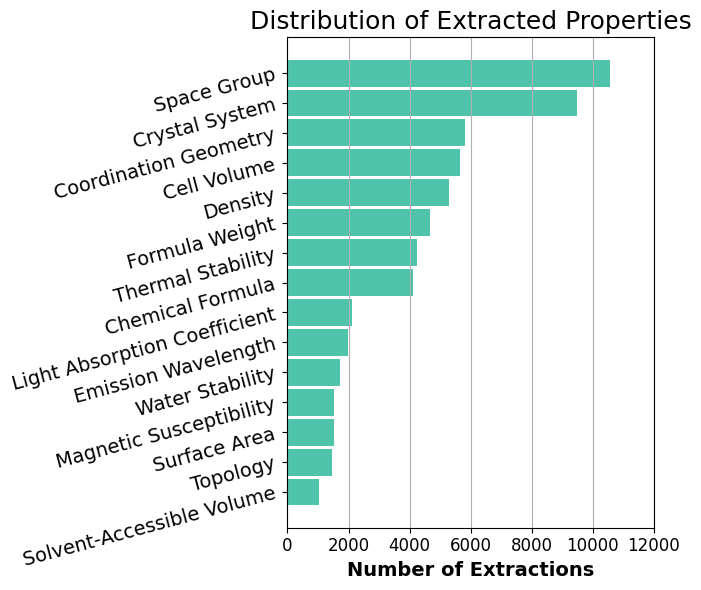

In [509]:
fig, ax = plt.subplots(figsize=(7, 6))

top_k = 15

labels = [dist_fil_props.loc[i, "Property"].title() for i in range(top_k)]
pos = np.arange(len(labels))

values = [dist_fil_props.loc[i, "Ref Code"] for i in range(top_k)]

ax.barh(pos, values, align='center', height=0.9, color="#4fc4ab")
ax.set_yticks(pos, labels=labels, rotation=15, fontsize=14)
ax.invert_yaxis()
ax.set_xlabel("Number of Extractions", fontsize=14, fontweight="bold")
ax.grid(visible=True, axis='x', which='major')
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), fontsize=12)
ax.set_title("Distribution of Extracted Properties", fontsize=18)

plt.tight_layout()
plt.savefig("/mnt/c/Users/Amro/Downloads/Distribution_Properties.png")

In [187]:
final_props_df.loc[final_props_df["Property"] == "density", "Original Property Name"].unique()

array(['density', 'density (calculated)', 'z, calculated density',
       'calculated density', 'dc', 'd calc', 'density, calculated',
       'd(calcd)', 'ρcalcd (calculated density)', 'd calcd.', 'd calcd',
       'dcalc', 'density calculated', 'dcalcd', 'dcal', 'dcalcd.',
       'ρ calcd', 'd calc.', 'dcalc (calculated density)'], dtype=object)

### Properties Per Publisher

In [443]:
exclude = ["space group", "crystal system", "coordination geometry", "formula weight", "chemical formula", "topology", "coordination number"]

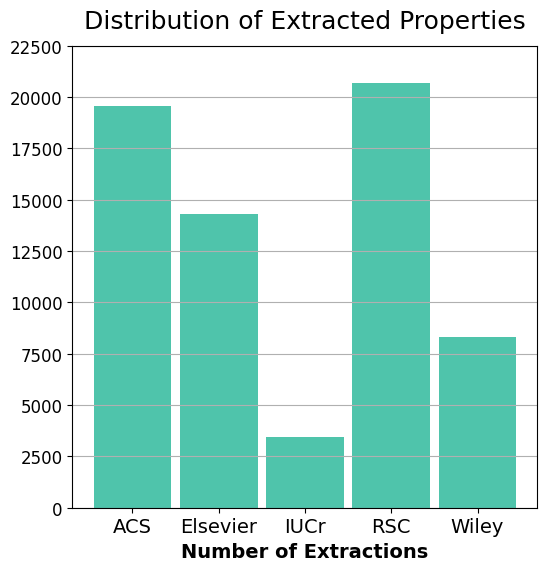

In [494]:
publisher_props_df = final_props_df2[["Ref Code", "Publisher"]].groupby("Publisher").count().reset_index()

fig, ax = plt.subplots(figsize=(6, 6))

labels = [i for i in publisher_props_df["Publisher"]]
pos = np.arange(len(labels))

values = publisher_props_df["Ref Code"]

ax.bar(pos, values, align='center', width=0.9, color="#4fc4ab")
ax.set_xticks(pos, labels=labels, fontsize=14)
ax.set_xlabel("Number of Extractions", fontsize=14, fontweight="bold")
ax.grid(visible=True, axis='y', which='major')
ax.set_yticks(ax.get_yticks(), ax.get_yticklabels(), fontsize=12)
ax.set_title("Distribution of Extracted Properties", fontsize=18, y=1.02)


plt.savefig("/mnt/c/Users/Amro/Downloads/Distribution_Properties_Publisher.png")

## Examining Application Extraction

### Application per MOF for Each Publisher

In [207]:
appl_df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,MOF Name,Ref Code,Application,Recommendation,Justification,Source
0,0,0.0,0,Cd(L2)(SCN)2<|>compound 10,DUHDOA,Not Provided,Not Provided,Not Provided,10.1021/cg900515j
1,1,1.0,1,InEu(BTB)7/3(H2O)2·(DEF)6<|>SMOF-2<|>compound 1,KUNSUJ,Solid-state lighting (SSL) applications that a...,Investigated,Metal–organic frameworks are a class of materi...,10.1021/cm500700z
2,2,2.0,2,[AuS2PPh(OC5H9)]2<|>2,OGIJIX,Not Provided,Not Provided,Not Provided,10.1021/ic0201856
3,3,3.0,3,[Cd(μ-tp)(μ-bpp)(H2O)]·nnH2O<|>3,WOCKOP,Not Provided,Not Provided,Not Provided,10.1021/cg701232n
4,4,4.0,4,[CuBr2(L1)]·nn(MeOH)<|>complex 3,CURYAQ,Not Provided,Not Provided,The documents do not mention any specific appl...,10.1021/cg901327m


In [208]:
appl_df = appl_df.drop(["Unnamed: 0.2", "Unnamed: 0.1", "Unnamed: 0"], axis = 1).merge(doi_pub_df, how='left', right_on="DOI", left_on="Source").drop("DOI", axis=1)

appl_df.head()

,MOF Name,Ref Code,Application,Recommendation,Justification,Source,Publisher
0,Cd(L2)(SCN)2<|>compound 10,DUHDOA,Not Provided,Not Provided,Not Provided,10.1021/cg900515j,ACS
1,InEu(BTB)7/3(H2O)2·(DEF)6<|>SMOF-2<|>compound 1,KUNSUJ,Solid-state lighting (SSL) applications that a...,Investigated,Metal–organic frameworks are a class of materi...,10.1021/cm500700z,ACS
2,[AuS2PPh(OC5H9)]2<|>2,OGIJIX,Not Provided,Not Provided,Not Provided,10.1021/ic0201856,ACS
3,[Cd(μ-tp)(μ-bpp)(H2O)]·nnH2O<|>3,WOCKOP,Not Provided,Not Provided,Not Provided,10.1021/cg701232n,ACS
4,[CuBr2(L1)]·nn(MeOH)<|>complex 3,CURYAQ,Not Provided,Not Provided,The documents do not mention any specific appl...,10.1021/cg901327m,ACS


### Applications per MOF

In [209]:
appl_per_mof = appl_df[["Ref Code", "Application"]].groupby("Ref Code").count()
average_APM = appl_per_mof["Application"].mean()

print(f"Average properties per CSD Entry: {average_APM:.1f}")

Average properties per CSD Entry: 1.1


<Axes: xlabel='Publisher'>

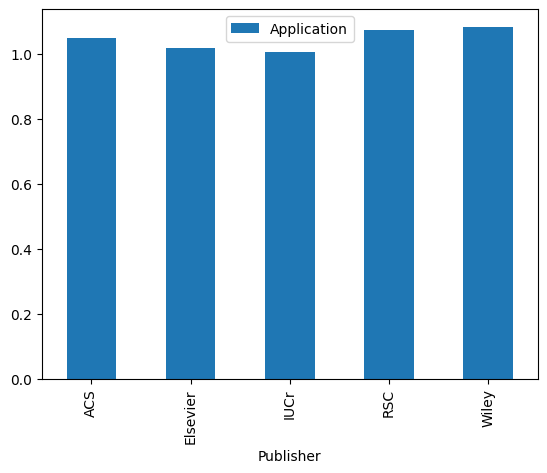

In [ ]:
appl_per_mof = appl_df[["Ref Code", "Application", "Publisher"]].groupby(["Ref Code", "Publisher"]).count().groupby("Publisher").mean()

appl_per_mof.plot(kind="bar")

### Distribution of Applications Found

In [210]:
dist_appl = appl_df
dist_appl["Application"] = dist_appl["Application"].apply(lambda x: x.lower())
dist_appl = appl_df[["Ref Code", "Application"]].groupby("Application").count().sort_values("Ref Code", ascending=False)

dist_appl.reset_index(inplace=True)

dist_appl.head()

,Application,Ref Code
0,not provided,9557
1,hydrogen storage,294
2,luminescent materials,172
3,luminescence,139
4,co2 adsorption,115


Text(0.5, 1.0, 'Distribution of extracted properties')

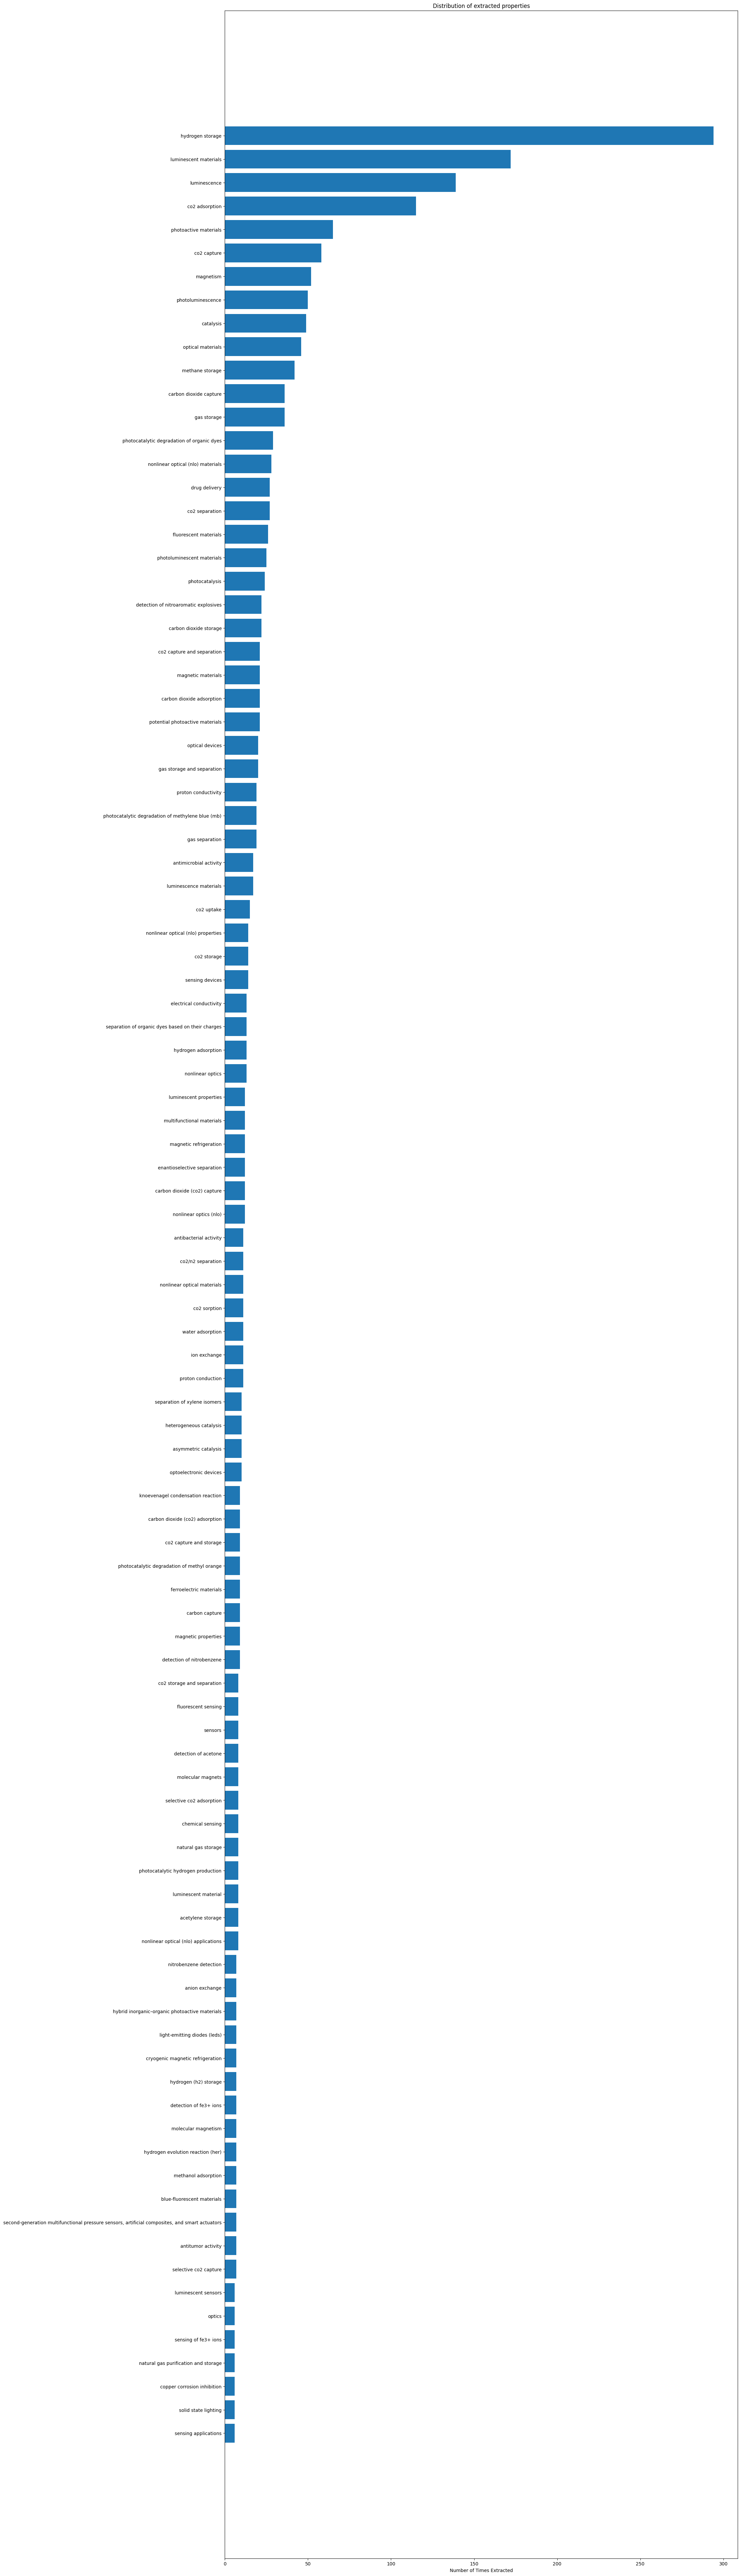

In [211]:
fig, ax = plt.subplots(figsize=(20, 100))

labels = list(dist_appl["Application"].iloc[1:100])
pos = np.arange(len(labels))

values = dist_appl["Ref Code"].iloc[1:100]

ax.barh(pos, values, align='center')
ax.set_yticks(pos, labels=labels)
ax.invert_yaxis()
ax.set_xlabel("Number of Times Extracted")
ax.set_title("Distribution of extracted properties")

### Applications After Filtering

In [458]:
appl_filtered_df = pd.read_csv("applications_filtered.csv")
appl_filtered_df = appl_filtered_df.merge(doi_pub_df, how="left", right_on="DOI", left_on="Source")

In [452]:
dist_appl_df = appl_filtered_df
dist_appl_df["Application"] = dist_appl_df["Application"].apply(lambda x: x.lower())
dist_appl_df = appl_filtered_df[["Ref Code", "Application"]].groupby("Application").count().sort_values("Ref Code", ascending=False)

dist_appl_df.reset_index(inplace=True)

dist_appl_df.head()

,Application,Ref Code
0,photoluminescence,587
1,co2 storage,388
2,h2 storage,373
3,gas separation,189
4,catalysis,115


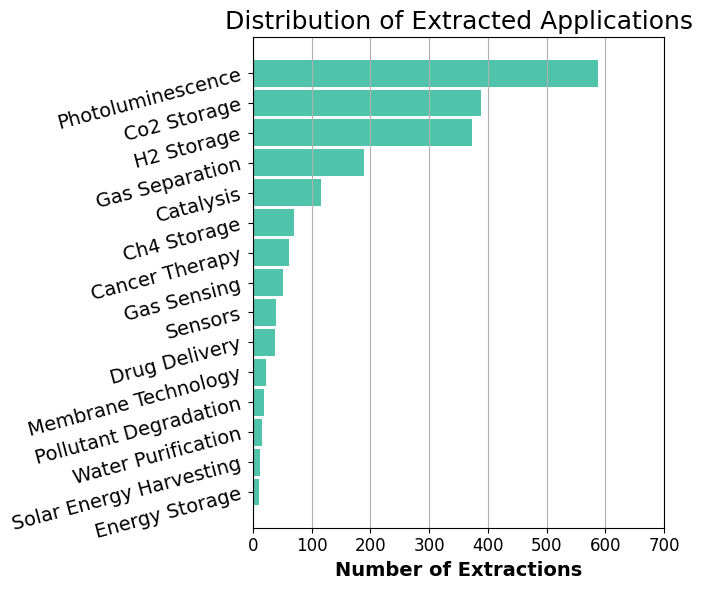

In [510]:
fig, ax = plt.subplots(figsize=(7, 6))

top_k = 15

labels = [dist_appl_df.loc[i, "Application"].title() for i in range(top_k)]
pos = np.arange(len(labels))

values = [dist_appl_df.loc[i, "Ref Code"] for i in range(top_k)]

ax.barh(pos, values, align='center', height=0.9, color="#4fc4ab")
ax.set_yticks(pos, labels=labels, rotation=15, fontsize=14)
ax.invert_yaxis()
ax.set_xlabel("Number of Extractions", fontsize=14, fontweight="bold")
ax.grid(visible=True, axis='x', which='major')
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), fontsize=12)
ax.set_title("Distribution of Extracted Applications", fontsize=18)

plt.tight_layout()
plt.savefig("/mnt/c/Users/Amro/Downloads/Distribution_Applications.png")

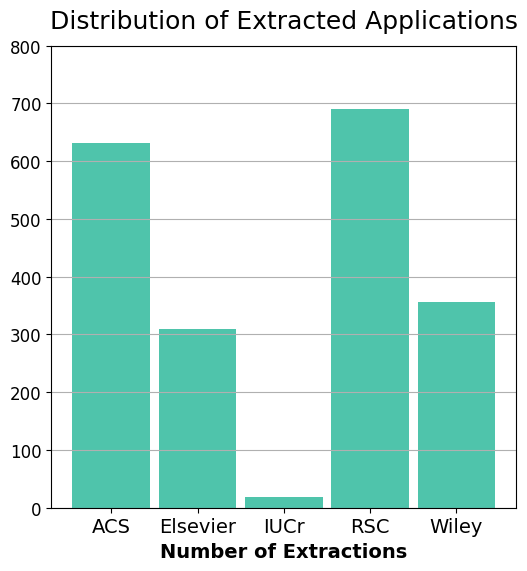

In [492]:
appl_publi_df = appl_filtered_df[["Ref Code", "Publisher"]].groupby("Publisher").count().reset_index()

fig, ax = plt.subplots(figsize=(6, 6))

labels = [i for i in appl_publi_df["Publisher"]]
pos = np.arange(len(labels))

values = appl_publi_df["Ref Code"]

ax.bar(pos, values, align='center', width=0.9, color="#4fc4ab")
ax.set_xticks(pos, labels=labels, fontsize=14)
ax.set_xlabel("Number of Extractions", fontsize=14, fontweight="bold")
ax.grid(visible=True, axis='y', which='major')
ax.set_yticks(ax.get_yticks(), ax.get_yticklabels(), fontsize=12)
ax.set_title("Distribution of Extracted Applications", fontsize=18, y=1.02)


plt.savefig("/mnt/c/Users/Amro/Downloads/Distribution_Applications_Publisher.png")

### Applications Filtering Using Embeddings with text-ada-002

In [218]:
from openai import OpenAI
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture

In [219]:
dist_appl["Embedding"] = pd.Series(np.zeros(len(dist_appl)))

dist_appl.head()

,Application,Ref Code,Embedding
0,not provided,9557,0.0
1,hydrogen storage,294,0.0
2,luminescent materials,172,0.0
3,luminescence,139,0.0
4,co2 adsorption,115,0.0


In [220]:
with open(".apikey", 'r') as f:
    client = OpenAI(api_key=f.read())

dist_appl["Embedding"][:2000] = dist_appl["Application"][:2000].apply(lambda x: 
                                                        client.embeddings.create(input=x.lower(),
                                                                                model="text-embedding-ada-002").data[0].embedding)

/tmp/ipykernel_36864/4096029544.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dist_appl["Embedding"][:2000] = dist_appl["Application"][:2000].apply(lambda x:
/tmp/ipykernel_36864/4096029544.py:4: SettingWithCopyWarning: 
A value is try

In [221]:
appl_embeddings = np.array(list(dist_appl["Embedding"][:2000]))

Text(0.5, 1.0, 'TSNE only')

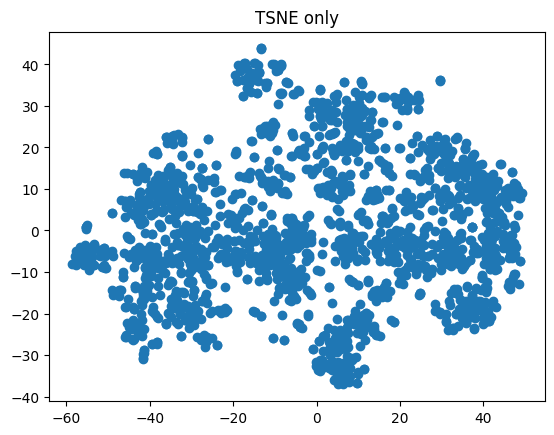

In [243]:
appl_tsne = TSNE(n_components=2, perplexity=50, learning_rate='auto', init='random')
appl_tsne = appl_tsne.fit_transform(appl_embeddings)

fig, ax = plt.subplots()

ax.scatter(x=appl_tsne[:, 0], y=appl_tsne[:, 1])
ax.set_title("TSNE only")

In [278]:
k = 20
model = GaussianMixture(k) # KMeans(k)

model.fit(prop_tsne)

clusters = model.predict(appl_tsne)

Text(0.5, 1.0, 'TSNE only')

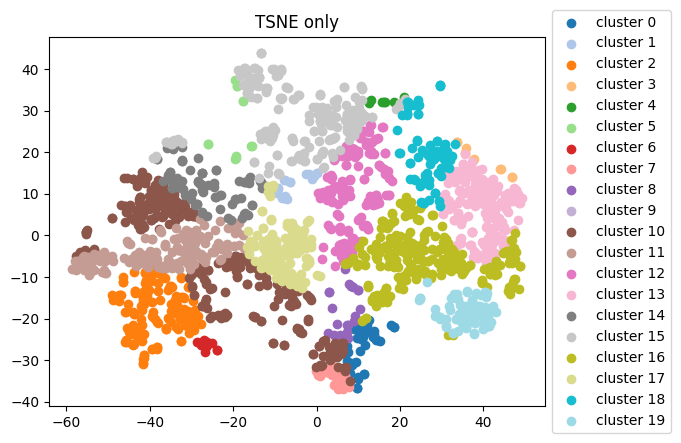

In [279]:
fig, ax = plt.subplots()

cmap = plt.colormaps.get("tab20")
colors = [cmap(i) for i in range(k)]

for i in range(k):
    ax.scatter(x=appl_tsne[clusters==i, 0], y=appl_tsne[clusters==i, 1], c=[colors[i]], label=f"cluster {i}")

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("TSNE only")

In [284]:
dist_appl[:2000].iloc[clusters==15]

,Application,Ref Code,Embedding
0,not provided,9557,"[-0.023350298404693604, -0.014436210505664349,..."
9,catalysis,49,"[-0.022852880880236626, 0.0005799133214168251,..."
20,photocatalysis,24,"[-0.017616605386137962, 0.010143905878067017, ..."
59,knoevenagel condensation reaction,9,"[-0.016113320365548134, -0.007988267578184605,..."
75,photocatalytic hydrogen production,8,"[-0.010936281643807888, -1.9879929823218845e-0..."
...,...,...,...
1953,ce−mdip2,1,"[-0.03490802273154259, 0.0004939072532579303, ..."
1954,ch bond functionalization,1,"[-0.010377591475844383, 0.0005363999516703188,..."
1959,chemical fixation of co2 with epoxides to form...,1,"[-0.0010106157278642058, 0.010057352483272552,..."
1968,co2 cycloaddition reactions,1,"[-0.00958356074988842, -0.006922226864844561, ..."


## Water Stability

In [519]:
ws_df = ws_df.drop(["Unnamed: 0.2", "Unnamed: 0.1", "Unnamed: 0"], axis=1)
ws_df.head()

,MOF Name,Ref Code,Property,Value,Units,Condition,Summary,Reference
0,Cd(L2)(SCN)2<|>compound 10,DUHDOA,Water Stability,Not provided,NaN,NaN,The document does not provide specific informa...,10.1021/cg900515j
1,InEu(BTB)7/3(H2O)2·(DEF)6<|>SMOF-2<|>compound 1,KUNSUJ,Water Stability,Not provided,NaN,NaN,Not provided,10.1021/cm500700z
2,[AuS2PPh(OC5H9)]2<|>2,OGIJIX,Water Stability,Not provided,NaN,NaN,The document does not provide specific informa...,10.1021/ic0201856
3,[Cd(μ-tp)(μ-bpp)(H2O)]·nnH2O<|>3,WOCKOP,Water Stability,Not provided,NaN,NaN,The document does not provide explicit informa...,10.1021/cg701232n
4,[CuBr2(L1)]·nn(MeOH)<|>complex 3,CURYAQ,Water Stability,Not provided,NaN,NaN,The document does not provide specific informa...,10.1021/cg901327m


In [206]:
for i in range(len(ws_df)):
    if ws_df.loc[i, "Value"].lower() == "not provided" or ws_df.loc[i, "Value"].lower() == "stable" or ws_df.loc[i, "Value"].lower() == "unstable":
        continue
    
    if "insoluble" in ws_df.loc[i, "Value"].lower():
        ws_df.loc[i, "Value"] = "Stable"
    else:
        ws_df.loc[i, "Value"] = "Unstable"

ws_df["Value"].unique()

In [207]:
ws_df["Value"].unique()

array(['Not provided', 'Unstable', 'Stable'], dtype=object)

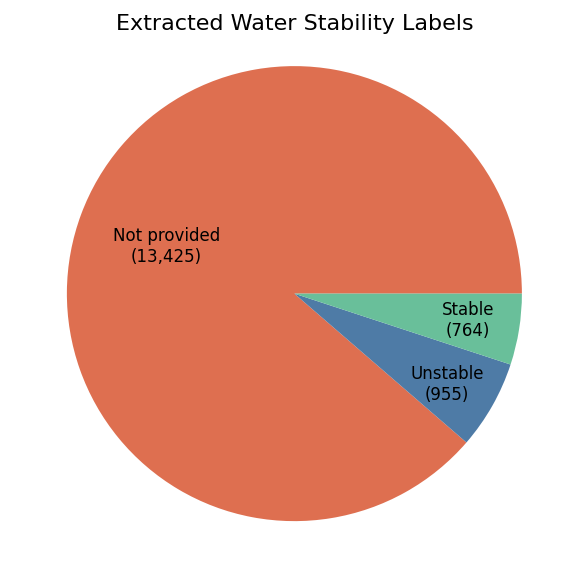

In [487]:
pie_chart_data = ws_df["Value"].value_counts()

labels = pie_chart_data.index
sizes = pie_chart_data.values

#labels = [f"{label}\n{size:,}" for label, size in zip(labels, sizes)]

fig, ax = plt.subplots(figsize=(6,6))

ax.set_title("Extracted Water Stability Labels", fontsize=16, y=0.95)


wedges, texts, autotexts = ax.pie(sizes,
       autopct= lambda pct: f"{int(round(pct*sum(sizes))/100):,}", colors=["#DE6F50", "#4E7BA6", "#69BF9A"], )

for i in range(len(autotexts)):
    autotexts[i].set_text(f"{labels[i]}\n({autotexts[i].get_text()})")
    autotexts[i].set_fontsize(12)

    if i == 1:
        autotexts[i].set_position(np.array(autotexts[i].get_position())+np.array([0.15, -0.1]))
    elif i == 2:
        autotexts[i].set_position(np.array(autotexts[i].get_position())+np.array([0.17, -0.02]))

plt.tight_layout(rect=[0,0,1,1])

plt.savefig("/mnt/c/Users/Amro/Downloads/Water_Stability_Labels.svg")

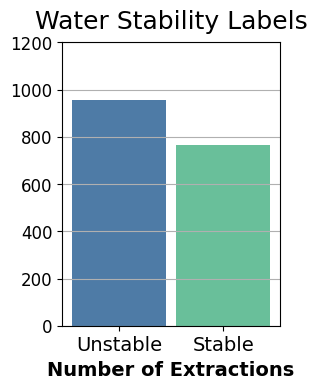

In [512]:
pie_chart_data = ws_df.loc[ws_df["Value"].apply(lambda x: x.lower() != "not provided"),"Value"].value_counts()

labels = pie_chart_data.index
sizes = pie_chart_data.values
pos = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(3, 4))

ax.bar(pos, sizes, align='center', width=0.9, color=["#4E7BA6", "#69BF9A"])
ax.set_xticks(pos, labels=labels, fontsize=14)
ax.set_xlabel("Number of Extractions", fontsize=14, fontweight="bold")
ax.grid(visible=True, axis='y', which='major')
ax.set_yticks(ax.get_yticks(), ax.get_yticklabels(), fontsize=12)
ax.set_title("Water Stability Labels", fontsize=18, y=1.02)


plt.tight_layout(rect=[0,0,1,1])
plt.savefig("/mnt/c/Users/Amro/Downloads/Water_Stability_Labels.png")

In [491]:
np.sum(sizes)

1719

### Comparing ChemUnity to WS24 Data

In [520]:
correct_ws_df = pd.read_csv("Fixed_Water_Stability.csv").drop("Unnamed: 0", axis=1)

correct_ws_df = correct_ws_df.merge(doi_pub_df, how='left', right_on="DOI", left_on="Reference").drop("DOI", axis=1)
correct_ws_df.head(5)

correct_ws_df["Property"] = pd.Series(["water stability" for i in range(len(correct_ws_df))])

In [521]:
ws24_df.head()

,DOI,refcode,acid,base,boiling,temperature,exposure time,"details (e.g. %RH, type of acid or base solution tested, etc.)",method(s) used to check stability,name in manuscript,"common name (can use CCDC portal, if there is a Synonyms entry)",formula unit,notes,Burtch label (1=unstable; 2=low kinetic stability; 3=high kinetic stability; 4=thermodynamic stability)
0,10.1002/anie.201101924,IYATEI,"N (tested, found unstable in HCl)",N,N,not available,not available,"""decomposed by aqueous hydrochloric acid""",not available,2,{Zn2(adc)2(dabco)}n,{Zn2(adc)2(dabco)}n,NaN,1
1,10.1002/chem.200801336,WOLREV,N,N,N,not available,not available,water and moisture sensitive,not available,1,Mn6(ttpm)3⋅5 DMF⋅3 H2O,Mn6(ttpm)3⋅5 DMF⋅3 H2O,NaN,1
2,10.1002/chem.200801336,WOLRIZ,N,N,N,not available,not available,water and moisture sensitive,not available,2,Cu[(Cu4Cl)(ttpm)2]2⋅CuCl2 ⋅5 DMF⋅11 H2O,Cu[(Cu4Cl)(ttpm)2]2⋅CuCl2 ⋅5 DMF⋅11 H2O,NaN,1
3,10.1002/chem.201002135,ALAMUW,N,N,N,not available,not available,desolvated form is extremely moisture sensitiv...,PXRD,SNU-50,{[Cu2(bdcppi)(dmf)2]⋅10 DMF⋅2 H2O}n,{[Cu2(bdcppi)(dmf)2]⋅10 DMF⋅2 H2O}n,NaN,1
4,10.1002/chem.201003680,UVUFUN,N,N,N,not available,a few weeks,dehydrated sample partially collapses in humid...,PXRD,[1(H2O)]Cl,[1(H2O)]Cl,[1(H2O)]Cl,NaN,1


In [522]:
ws24_df["WS Stability"] = ws24_df["Burtch label (1=unstable; 2=low kinetic stability; 3=high kinetic stability; 4=thermodynamic stability)"].apply(lambda x: "stable" if x>2 else "unstable")

In [523]:
joined_ws_chemunity_df = ws24_df[["refcode", "WS Stability", "DOI"]].merge(correct_ws_df.loc[correct_ws_df["Value"]!="Not provided",["Ref Code", "Value", "Summary"]], how="inner", left_on="refcode", right_on="Ref Code")

In [524]:
joined_ws_chemunity_df = joined_ws_chemunity_df.rename({"Value": "ChemUnity Stability", "Summary": "ChemUnity Summary"}, axis=1)
joined_ws_chemunity_df

,refcode,WS Stability,DOI,Ref Code,ChemUnity Stability,ChemUnity Summary
0,WOLREV,unstable,10.1002/chem.200801336,WOLREV,Unstable,This compound is water- and moisture-sensitive.
1,WOLRIZ,unstable,10.1002/chem.200801336,WOLRIZ,Unstable,The document states that Cu[(Cu4Cl)(ttpm)2]2·C...
2,ALAMUW,unstable,10.1002/chem.201002135,ALAMUW,Unstable,The structure of SNU-50' contains a vacant coo...
3,UVUFUN,unstable,10.1002/chem.201003680,UVUFUN,Unstable,PXRD analyses of the dehydrated [1]Cl have dis...
4,USAHAZ,unstable,10.1002/zaac.201600133,USAHAZ,Unstable,The lack of a well-defined plateau at ca. 30% ...
...,...,...,...,...,...,...
137,QIFLOI,stable,10.1021/cg400183s,QIFLOI,Stable,We also measured the hydrothermal stability of...
138,QIFLUO,stable,10.1021/cg400183s,QIFLUO,Stable,We also measured the hydrothermal stability of...
139,IMIDZB10,stable,10.1021/ja308786r,IMIDZB10,Stable,SALEM-2 remains crystalline after 24 h in boil...
140,SOYWUZ,stable,10.1021/ja807357r,SOYWUZ,Stable,Compounds 1−6 were stable for months under air...


In [525]:
joined_ws_chemunity_df.to_csv("ws24_benchmark_results.csv")




VAGMAT
Solid SNU-30 is insoluble in water and common organic solvents such as DMF, DEF, N,N-dimethylacetamide (DMA), EtOH, MeOH, tBuOH, and MeCN. However, the document does not provide specific information about the stability of SNU-30 when exposed to moisture or steam, soaking or boiling in water or an aqueous solution. Therefore, based on the available information, the water stability of SNU-30 is considered 'Not provided'.



UBIPAY
"Because 2 is insoluble in common organic solvents and water, the crystals of 2 were decomposed by using an aqueous 10% HCl solution." "The PXRD pattern showed that the framework structure of 2 was maintained upon the removal of the solvent molecules but the diffraction is weakened."



WASPAI
Complexes 1–4 are insoluble in water and common organic solvents, and crystals suitable for X-ray diffraction analysis cannot be obtained by evaporating an appropriate solution of 1–4. We found that they can be dissolved in a concentrated solution of ammonia by 

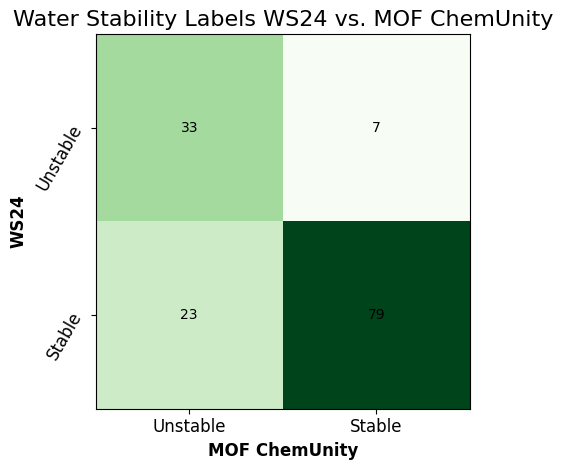

In [527]:
confusion_matrix = np.zeros((2,2))

for i in range(len(joined_ws_chemunity_df)):
    chemunity = joined_ws_chemunity_df.loc[i, "ChemUnity Stability"]
    ws24 = joined_ws_chemunity_df.loc[i, "WS Stability"]

    if chemunity.lower() == "stable":
        chemunity_index = 1
    else:
        chemunity_index = 0
    
    if ws24.lower() == "stable":
        ws_index = 1
    else:
        ws_index = 0
    
    if chemunity_index == 0 and ws_index == 1:
        print("\n\n")
        print(joined_ws_chemunity_df.loc[i, "Ref Code"])
        print(joined_ws_chemunity_df.loc[i, "ChemUnity Summary"])


    confusion_matrix[ws_index, chemunity_index] += 1

print(f"Percent Match b/w ChemUnity and WS24 Water Stability Labels: {np.trace(confusion_matrix)/np.sum(confusion_matrix):0.2%}")

fig, ax = plt.subplots()

ax.imshow(confusion_matrix, cmap="Greens")
ax.set_title("Water Stability Labels WS24 vs. MOF ChemUnity", fontsize=16)
ax.set_xticks(ticks=np.arange(2), labels=["Unstable", "Stable"], fontsize=12)
ax.set_yticks(ticks=np.arange(2), labels=["Unstable", "Stable"], fontsize=12, rotation=60)
ax.set_xlabel("MOF ChemUnity", fontsize=12, fontweight="bold")
ax.set_ylabel("WS24", fontsize=12, fontweight="bold")

for j in range(2):
    for i in range(2):
        ax.text(j, i, f"{confusion_matrix[i,j]:0n}", ha="center", va="center", color="black")

plt.tight_layout(rect=[0,0,1,1])

plt.savefig("/mnt/c/Users/Amro/Downloads/Water_Stability_WS24.png")